## **Import Modules & Dataset**

In [ ]:
#mengimport modul yang digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
#mengimport dataset yang digunakan
transaction = pd.read_csv('Case Study - Transaction.csv',sep=";")
store = pd.read_csv('Case Study - Store.csv',sep=";")
customer = pd.read_csv('Case Study - Customer.csv',sep=";")
product = pd.read_csv('Case Study - Product.csv',sep=";")

# **Preprocessing**

In [ ]:
#melihat dataset
transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [ ]:
#melihat informasi yang terdapat pada dataset
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
#mengubah tipe data
transaction['Date']= pd.to_datetime(transaction['Date'],format='%d/%m/%Y')
transaction = transaction.astype({"ProductID":"category","StoreID":"category"})
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   category      
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   category      
dtypes: category(2), datetime64[ns](1), int64(4), object(1)
memory usage: 246.3+ KB


In [ ]:
#mengecek kategori yang terdapat pada variabel kategorik
print(transaction.groupby(['ProductID'])['ProductID'].count())
print("")
print(transaction.groupby(['StoreID'])['StoreID'].count())

ProductID
P1     397
P10    620
P2     530
P3     519
P4     390
P5     814
P6     255
P7     522
P8     485
P9     488
Name: ProductID, dtype: int64

StoreID
1     354
2     364
3     367
4     350
5     362
6     368
7     355
8     343
9     370
10    355
11    355
12    363
13    368
14    346
Name: StoreID, dtype: int64


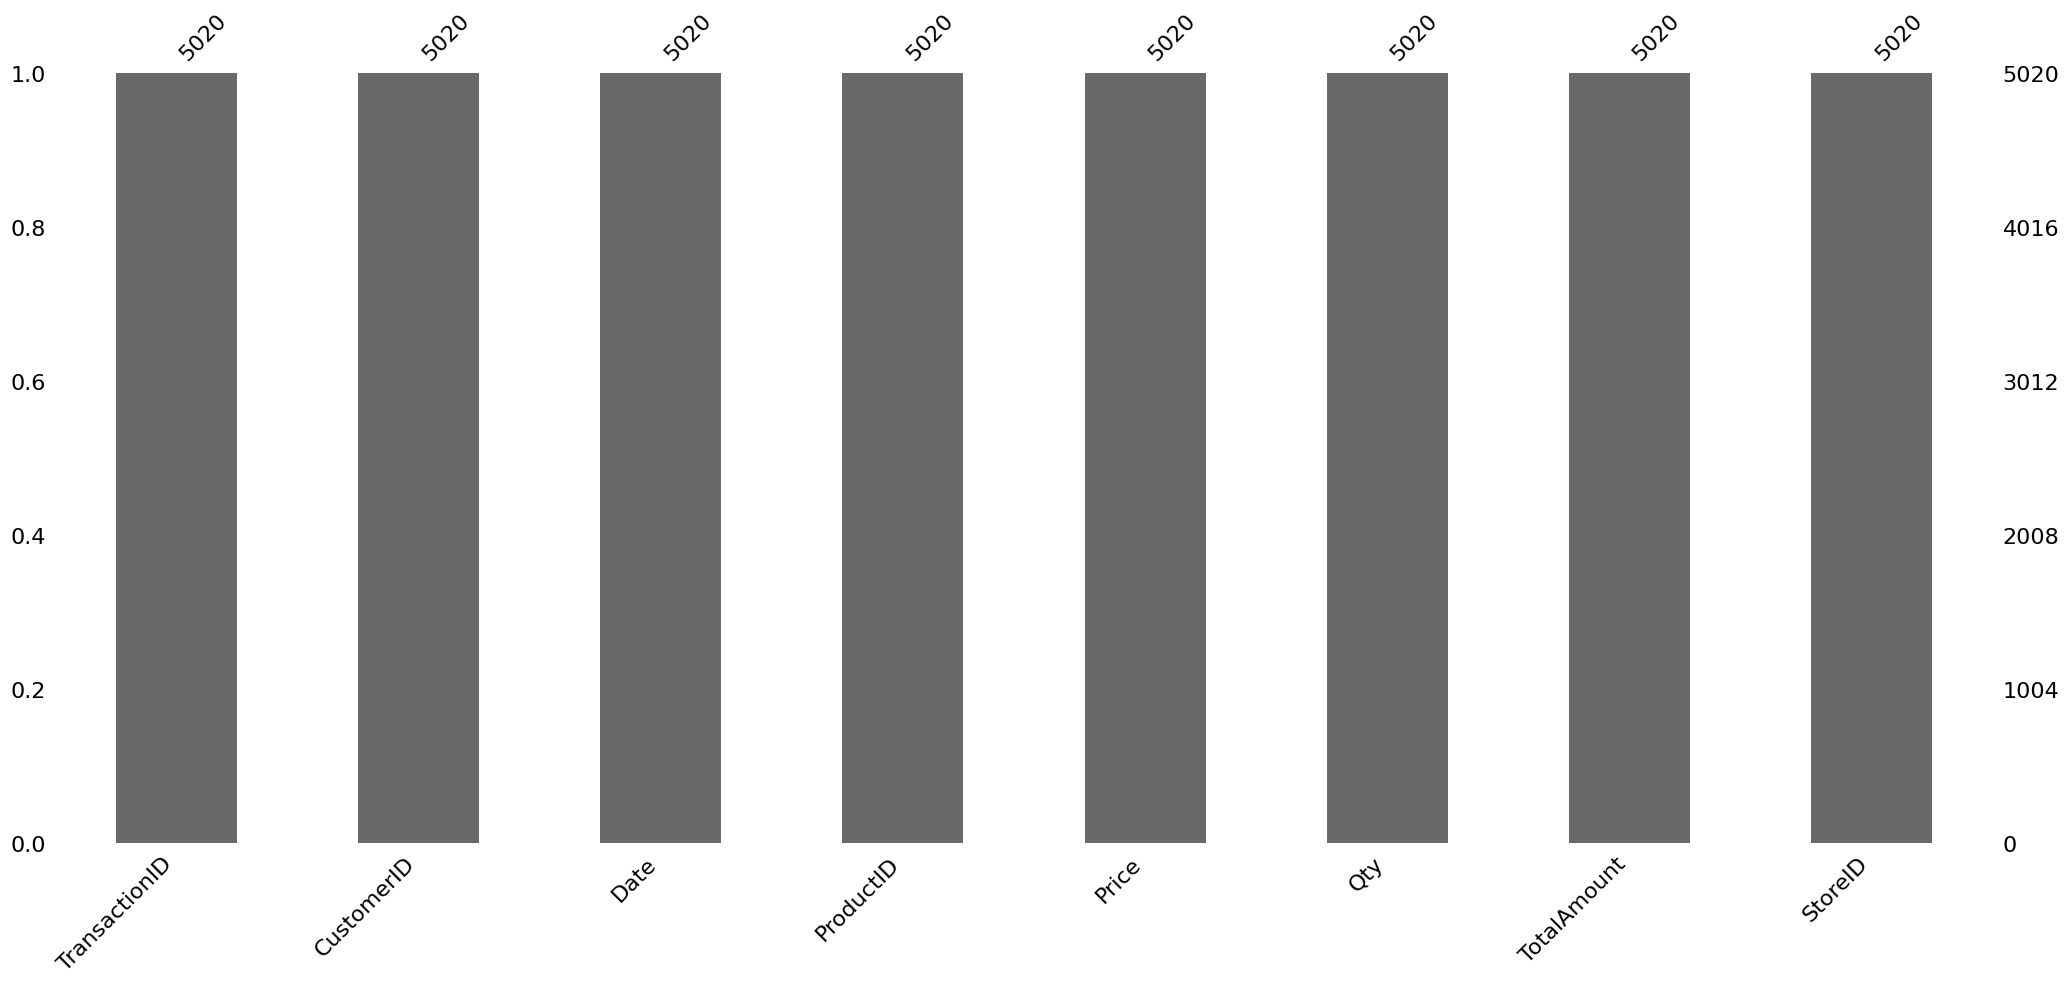

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [ ]:
#mengecek missing values
msno.bar(transaction)
plt.show()
transaction.isna().sum()

In [ ]:
#mengecek duplikasi
transaction.duplicated().value_counts()

False    5020
dtype: int64

In [ ]:
#statistika deskriptif
transaction[["Price","Qty","TotalAmount"]].describe()

,Price,Qty,TotalAmount
count,5020.000000,5020.000000,5020.000000
mean,9684.800797,3.644622,32279.482072
std,4600.708780,1.855295,19675.462455
min,3200.000000,1.000000,7500.000000
25%,4200.000000,2.000000,16000.000000
50%,9400.000000,3.000000,28200.000000
75%,15000.000000,5.000000,47000.000000
max,18000.000000,10.000000,88000.000000


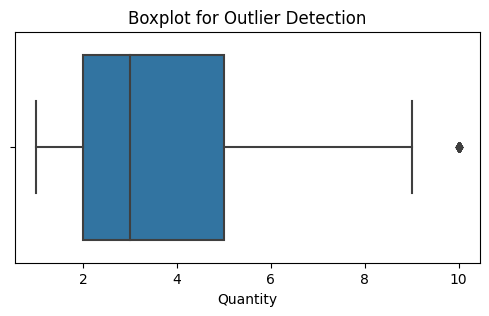

In [ ]:
#mengecek outlier pada kolom "Qty"
plt.figure(figsize=(6, 3))
sns.boxplot(x=transaction['Qty'])
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Quantity')
plt.show()

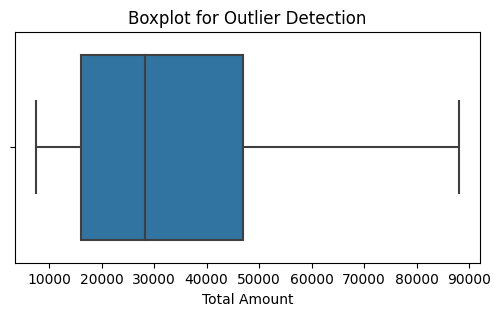

In [ ]:
#mengecek outlier pada kolom "TotalAmount"
plt.figure(figsize=(6, 3))
sns.boxplot(x=transaction['TotalAmount'])
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Total Amount')
plt.show()

In [ ]:
#melihat dataset
store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [ ]:
#melihat informasi yang terdapat pada dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
#mengubah tipe data
store["Latitude"] = store['Latitude'].str.replace(',', '.').astype(float)
store["Longitude"] = store['Longitude'].str.replace(',', '.').astype(float)
store=store.astype({"GroupStore":"category","Type":"category"})
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   StoreID     14 non-null     int64   
 1   StoreName   14 non-null     object  
 2   GroupStore  14 non-null     category
 3   Type        14 non-null     category
 4   Latitude    14 non-null     float64 
 5   Longitude   14 non-null     float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
#mengecek kategori yang terdapat pada variabel kategorik
print(store.groupby(['GroupStore'])['GroupStore'].count())
print("")
print(store.groupby(['Type'])['Type'].count())

GroupStore
Buana           2
Gita            2
Harapan Baru    2
Lingga          2
Prestasi        2
Priangan        1
Prima           3
Name: GroupStore, dtype: int64

Type
General Trade    8
Modern Trade     6
Name: Type, dtype: int64


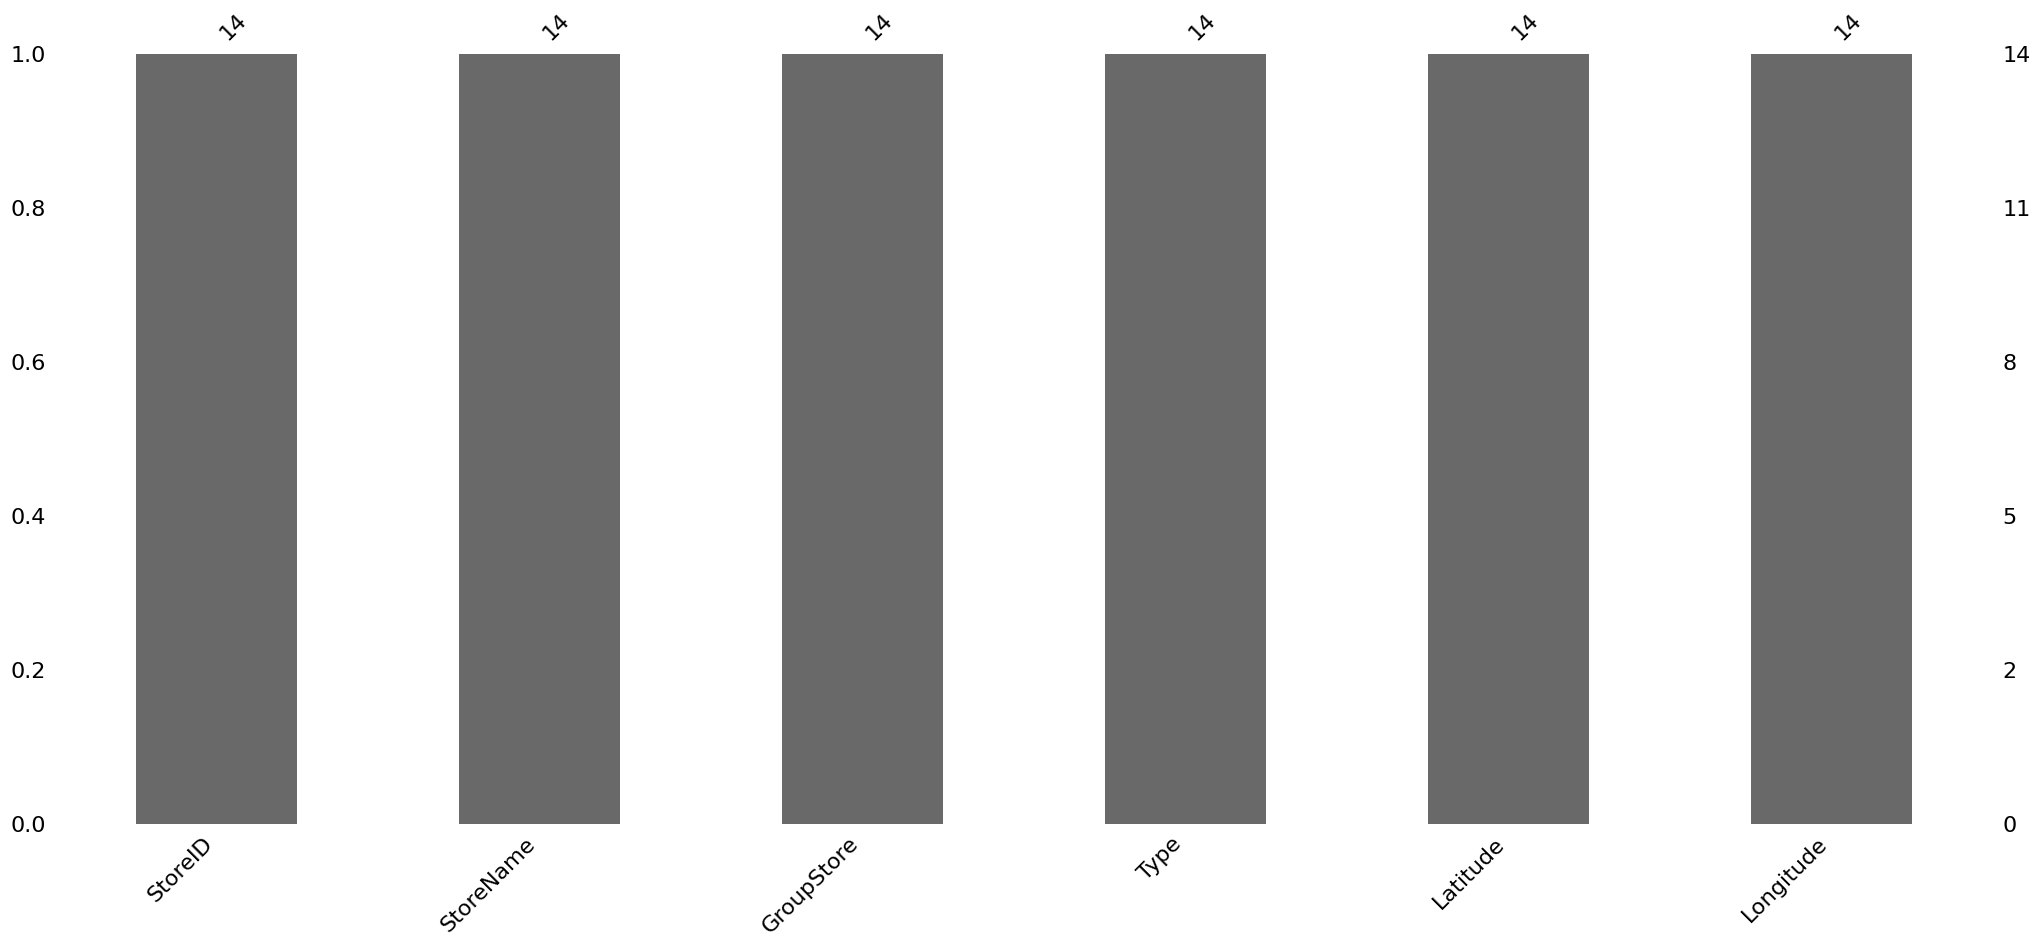

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
#mengecek missing values
msno.bar(store)
plt.show()
store.isna().sum()

In [ ]:
#mengecek duplikasi
store.duplicated().value_counts()

False    14
dtype: int64

In [ ]:
#melihat dataset
customer

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"
...,...,...,...,...,...
442,443,33,1,NaN,"9,28"
443,444,53,0,Married,"15,31"
444,445,51,0,Married,"14,48"
445,446,57,0,Married,"7,81"


In [ ]:
#melihat informasi pada dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
#mengubah tipe data
customer["Income"] = customer['Income'].str.replace(',', '.').astype(float)
customer=customer.astype({"Gender":"category","Marital Status":"category"})
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CustomerID      447 non-null    int64   
 1   Age             447 non-null    int64   
 2   Gender          447 non-null    category
 3   Marital Status  444 non-null    category
 4   Income          447 non-null    float64 
dtypes: category(2), float64(1), int64(2)
memory usage: 11.7 KB


In [ ]:
#mengecek kategori yang terdapat pada variabel kategorik
print(customer.groupby(['Marital Status'])['Marital Status'].count())
print("")
print(customer.groupby(['Gender'])['Gender'].count())

Marital Status
Married    340
Single     104
Name: Marital Status, dtype: int64

Gender
0    242
1    205
Name: Gender, dtype: int64


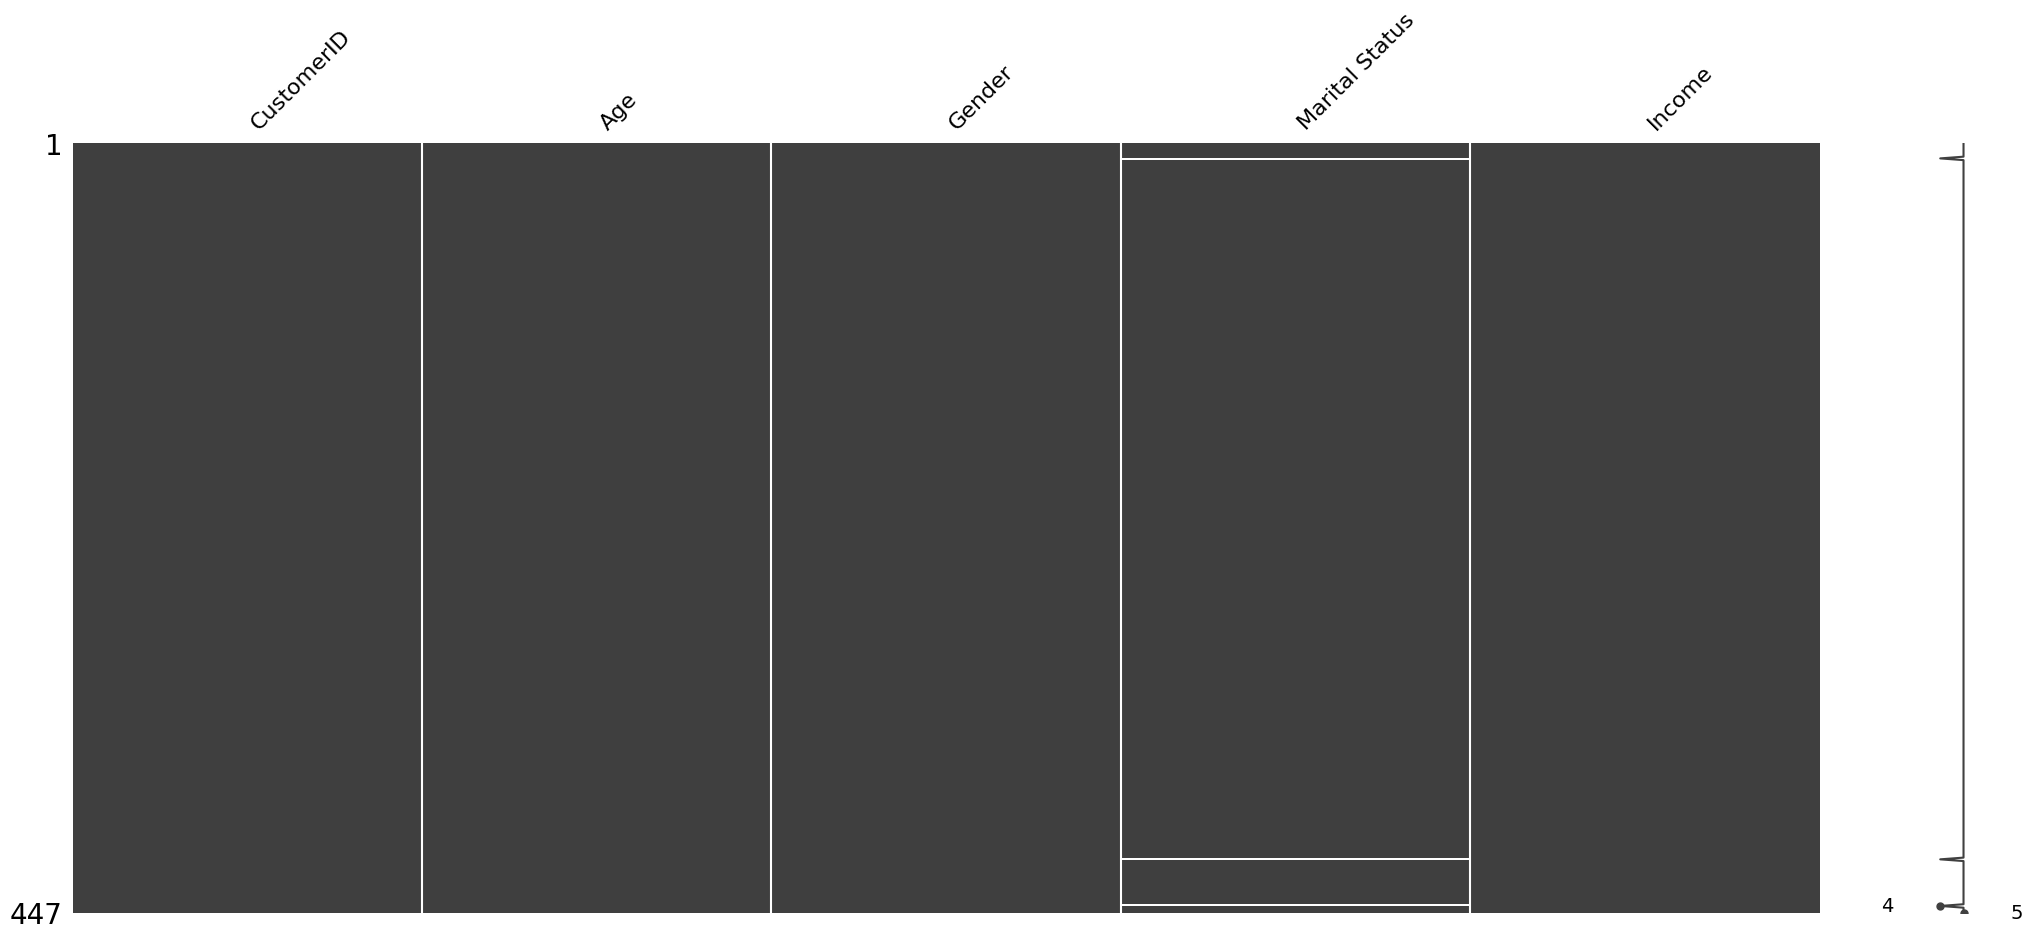

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [ ]:
#mengecek missing values
msno.matrix(customer)
plt.show()
customer.isna().sum()

In [ ]:
#mengecek rows dengan missing value
customer[customer['Marital Status'].isnull()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4.00
415,416,27,1,NaN,3.43
442,443,33,1,NaN,9.28


In [ ]:
#imputasi data (pake mode karena data kategorik)
customer['Marital Status'].fillna(customer['Marital Status'].mode()[0], inplace=True)
print(customer.isna().sum())
print("")
print(customer.groupby(['Marital Status'])['Marital Status'].count())

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

Marital Status
Married    343
Single     104
Name: Marital Status, dtype: int64


In [ ]:
#mengecek duplikasi
customer.duplicated().value_counts()

False    447
dtype: int64

In [ ]:
#statistika deskriptif(aneh ada age yang 0)
customer[["Income","Age"]].describe()

,Income,Age
count,447.000000,447.000000
mean,8.592103,39.782998
std,6.607065,12.848719
min,0.000000,0.000000
25%,4.175000,30.000000
50%,7.520000,39.000000
75%,10.810000,50.500000
max,71.300000,72.000000


In [ ]:
#akan dilihat lebih lanjut data dengan nilai "Age" <15
customer[customer['Age']<15]

,CustomerID,Age,Gender,Marital Status,Income
11,12,2,1,Married,4.94
73,74,3,1,Married,5.09
127,128,0,1,Married,6.77


In [ ]:
#akan didrop rows dengan anomali tersebut
anomaly = customer['Age']<15
customer = customer[~anomaly]
customer[["Income","Age"]].describe()

,Income,Age
count,444.000000,444.000000
mean,8.612320,40.040541
std,6.624442,12.501672
min,0.000000,18.000000
25%,4.162500,30.750000
50%,7.545000,39.000000
75%,10.845000,51.000000
max,71.300000,72.000000


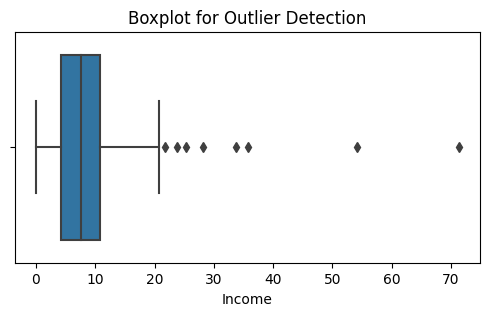

In [ ]:
#mengecek outlier pada kolom "Income"
plt.figure(figsize=(6, 3))
sns.boxplot(x=customer['Income'])
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Income')
plt.show()

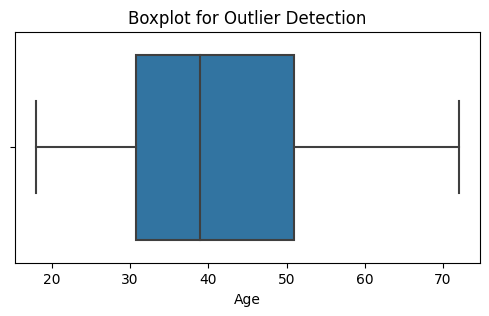

In [ ]:
#mengecek outlier pada kolom "Age"
plt.figure(figsize=(6, 3))
sns.boxplot(x=customer['Age'])
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Age')
plt.show()

In [ ]:
#melihat dataset
product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [ ]:
#melihat informasi yang terdapat pada dataset
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
#mengubah tipe data
product=product.astype({"ProductID":"category","Product Name":"category"})
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ProductID     10 non-null     category
 1   Product Name  10 non-null     category
 2   Price         10 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 988.0 bytes


In [ ]:
#mengecek kategori yang terdapat pada variabel kategorik
print(product.groupby(['ProductID'])['ProductID'].count())
print("")
print(product.groupby(['Product Name'])['Product Name'].count())

ProductID
P1     1
P10    1
P2     1
P3     1
P4     1
P5     1
P6     1
P7     1
P8     1
P9     1
Name: ProductID, dtype: int64

Product Name
Cashew           1
Cheese Stick     1
Choco Bar        1
Coffee Candy     1
Crackers         1
Ginger Candy     1
Oat              1
Potato Chip      1
Thai Tea         1
Yoghurt          1
Name: Product Name, dtype: int64


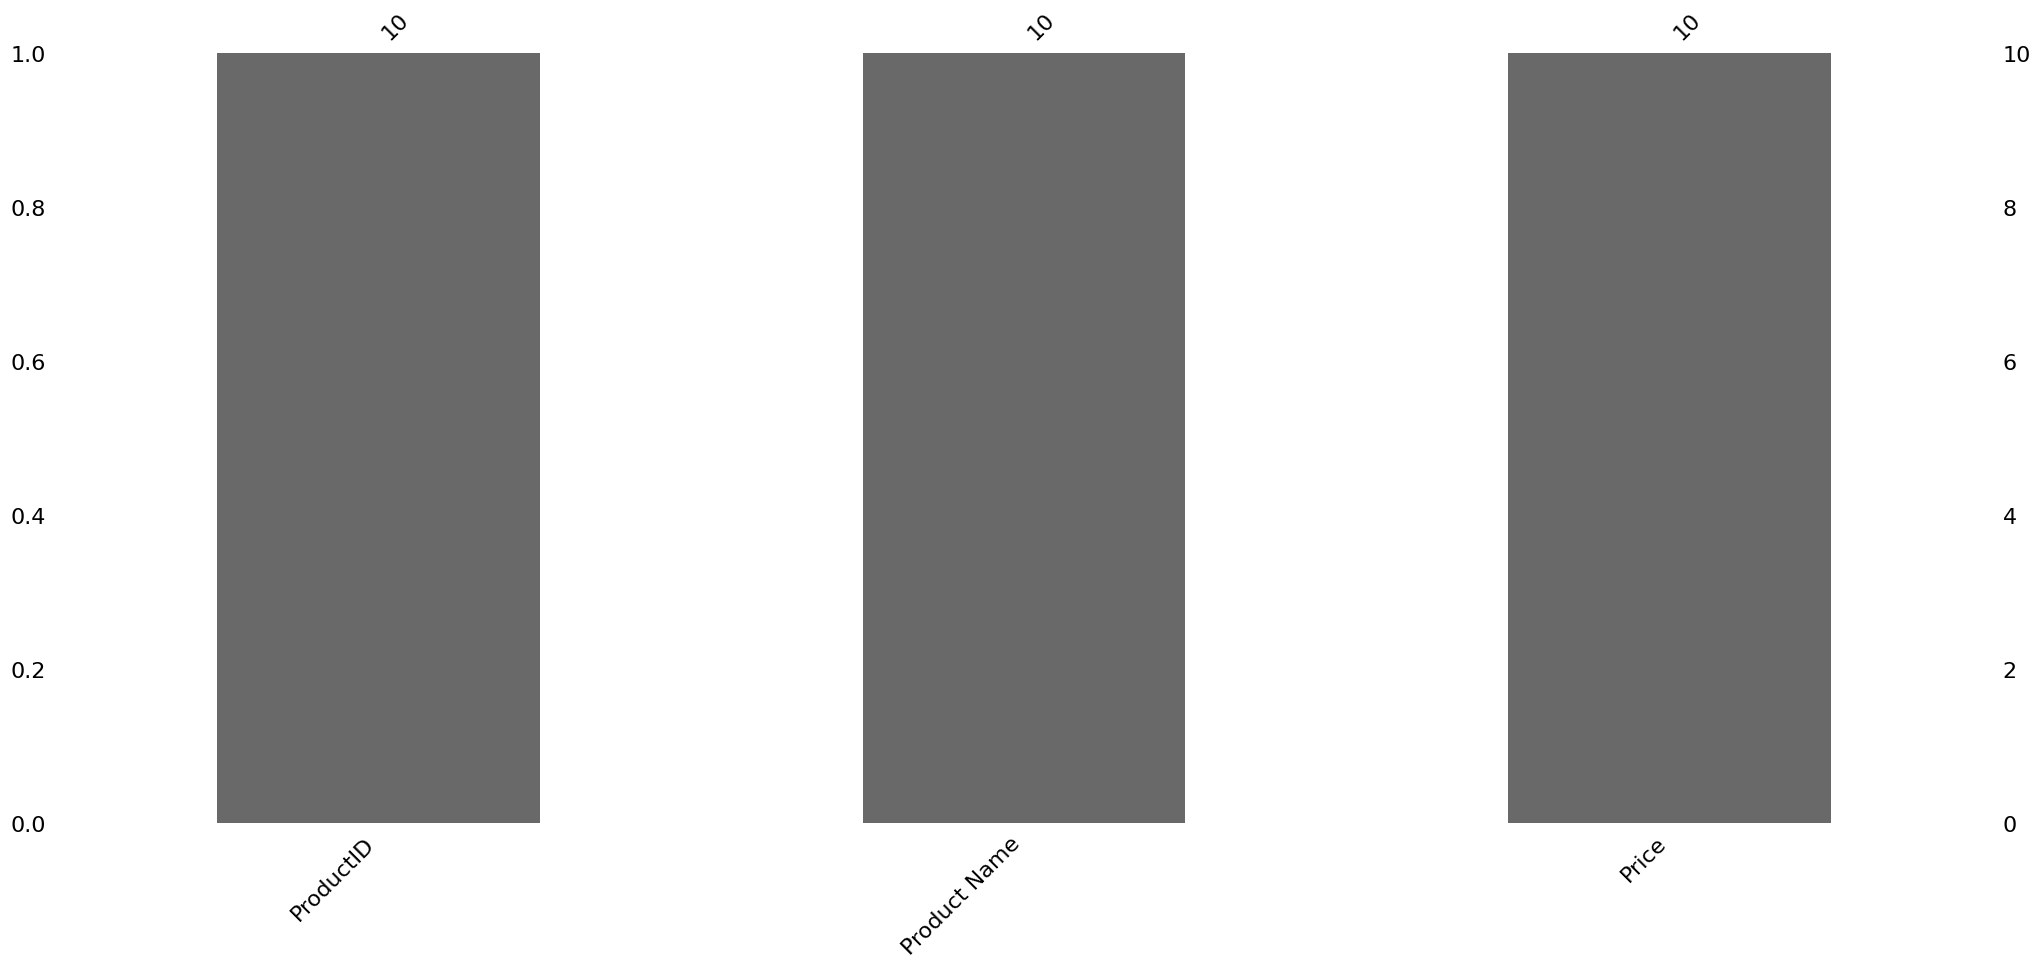

ProductID       0
Product Name    0
Price           0
dtype: int64

In [ ]:
#mengecek missing values
msno.bar(product)
plt.show()
product.isna().sum()

In [ ]:
#mengecek duplikasi
product.duplicated().value_counts()

False    10
dtype: int64

In [ ]:
#statistika deskriptif
product.describe()

,Price
count,10.000000
mean,10410.000000
std,4890.455557
min,3200.000000
25%,7825.000000
50%,9700.000000
75%,14250.000000
max,18000.000000


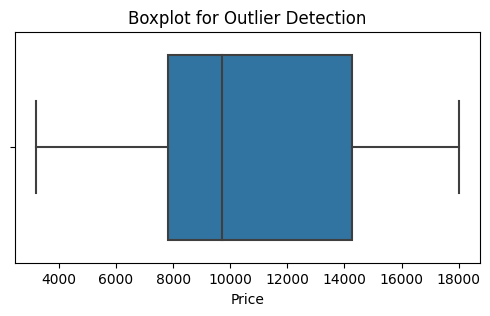

In [ ]:
#mengecek outlier pada kolom "Price"
plt.figure(figsize=(6, 3))
sns.boxplot(x=product['Price'])
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Price')
plt.show()

# Forecasting

In [ ]:
#merge semua data yang telah dipreprocessing
merged_df = pd.merge(transaction, customer, on='CustomerID')
merged_df = pd.merge(merged_df, product, on='ProductID')
merged_df = pd.merge(merged_df, store, on='StoreID')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4989 entries, 0 to 4988
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4989 non-null   object        
 1   CustomerID      4989 non-null   int64         
 2   Date            4989 non-null   datetime64[ns]
 3   ProductID       4989 non-null   category      
 4   Price_x         4989 non-null   int64         
 5   Qty             4989 non-null   int64         
 6   TotalAmount     4989 non-null   int64         
 7   StoreID         4989 non-null   int64         
 8   Age             4989 non-null   int64         
 9   Gender          4989 non-null   category      
 10  Marital Status  4989 non-null   category      
 11  Income          4989 non-null   float64       
 12  Product Name    4989 non-null   category      
 13  Price_y         4989 non-null   int64         
 14  StoreName       4989 non-null   object        
 15  Grou

In [ ]:
#bikin dataset time-series baru dengan kolom date dan qty,
#kemudian groupby berdasarkan tanggal order dengan qty dijumlahkan
datexqty = merged_df[["Date","Qty"]]
datexqty.set_index('Date', inplace=True)
ts_df = datexqty.groupby('Date').sum()
ts_df

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
...,...
2022-12-27,70
2022-12-28,61
2022-12-29,42


<Axes: xlabel='Date'>

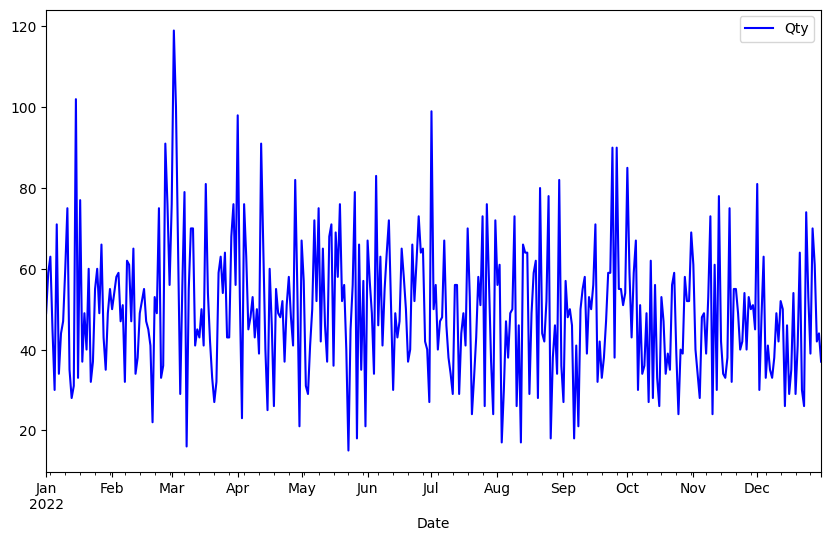

In [ ]:
#plot dari data time-series
ts_df.plot(kind='line', color='blue',figsize=(10, 6))

In [ ]:
#tes stasioneritas menggunakan augmented dickey-fuller(ADF) test
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_df)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
#stasioner, tidak perlu didifferencing

ADF Statistic: -19.318068181098877
p-value: 0.0


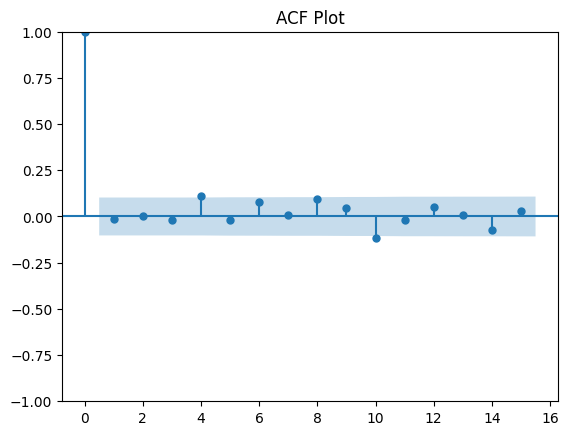

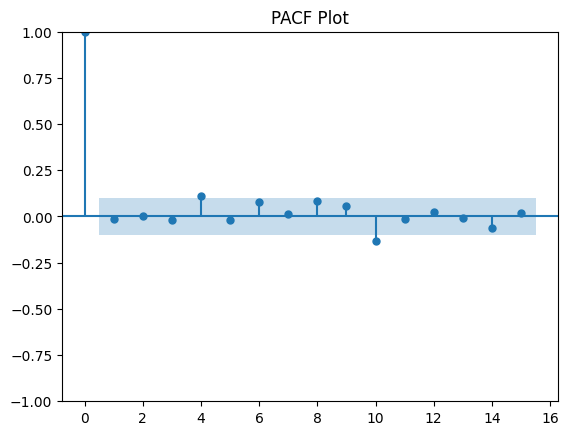

In [ ]:
#mengecek order dari ARIMA menggunakan plot ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(ts_df, lags=15)
plt.title('ACF Plot')
plt.show()

plot_pacf(ts_df, lags=15)
plt.title('PACF Plot')
plt.show()


In [ ]:
#mengecek model terbaik
import statsmodels.api as sm
order1 = (1, 0, 1)
order2 = (2, 0, 2)
order3 = (3, 0, 3)
order3 = (3, 0, 3)
order4 = (4, 0, 4)
order5 = (5, 0, 5)
order6 = (6, 0, 5)


model1 = sm.tsa.arima.ARIMA(ts_df, order=(1, 0, 1))
model2 = sm.tsa.arima.ARIMA(ts_df, order=(2, 0, 2))
model3 = sm.tsa.arima.ARIMA(ts_df, order=(3, 0, 3))
model4 = sm.tsa.arima.ARIMA(ts_df, order=(4, 0, 4))
model5 = sm.tsa.arima.ARIMA(ts_df, order=(5, 0, 5))
model6 = sm.tsa.arima.ARIMA(ts_df, order=(6, 0, 5))

results = [model1.fit(), model2.fit(),model3.fit(),model4.fit(),model5.fit(),model6.fit()]

for i in results:
  print(i.aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

3095.316597751217
3097.553565472534
3097.427440927556
3090.6043573922207
3100.5158172297697
3102.895450218636


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE for Forecast Train Data: 15.544310412315951


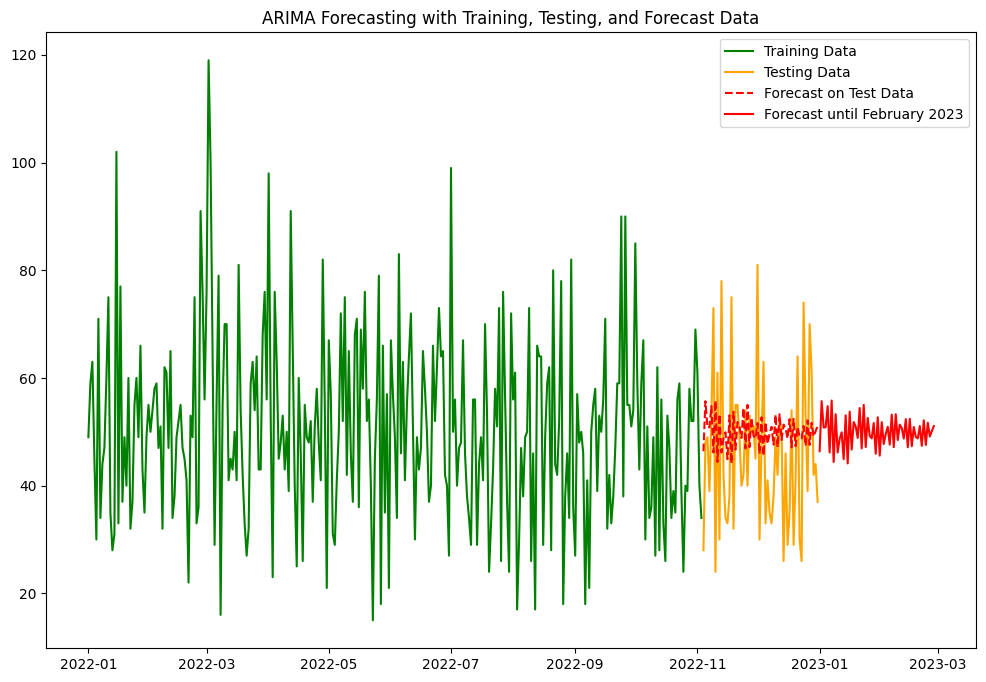

In [ ]:
#membagi data train dan test
test_size = 58
train_data, test_data = ts_df[:-test_size], ts_df[-test_size:]

# Fit ARIMA model
model_fit = model4.fit()

# Forecast
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
time_index_future = pd.date_range(start=ts_df.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1 = sqrt(mean_squared_error(test_data, forecast_values))
print(f"RMSE for Forecast Train Data: {rmse1}")


# Visualize the results
plt.figure(figsize=(12, 8))
plt.plot(train_data.index, train_data, label='Training Data', color='green')
plt.plot(test_data.index, test_data, label='Testing Data', color='orange')
plt.plot(test_data.index, forecast_values, label='Forecast on Test Data', color='red', linestyle='dashed')
plt.plot(time_index_future,forecast_values, color='red', label='Forecast until February 2023')
plt.title('ARIMA Forecasting with Training, Testing, and Forecast Data')
plt.legend()
plt.show()

49.92697966578447

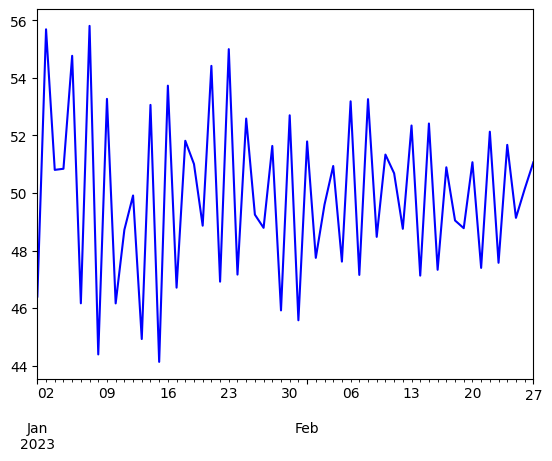

In [ ]:
#Predicted future values plot
forecast_values.plot(kind='line', color='blue')
np.mean(forecast_values)

# K-Means Clustering


In [ ]:
cl_df = merged_df.groupby("CustomerID").agg({
    "TransactionID": "count",
    "Qty": "sum",
    "TotalAmount": "sum"
}).reset_index()
cl_df = cl_df.set_index("CustomerID")
cl_df

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


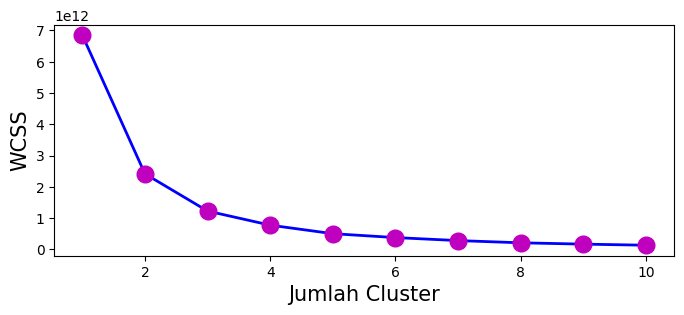

In [ ]:
#menentukan banyak K kelompok optimal
from sklearn.cluster import KMeans
wcss=[]
for n in range(1,11):
  model=KMeans(n_clusters=n, init="k-means++", n_init=10,max_iter=300,tol=0.0001,random_state=100)
  model.fit(cl_df)
  wcss.append(model.inertia_)

plt.figure(figsize=(8,3))
plt.plot(list(range(1,11)),wcss,color='blue',marker="o",linewidth=2,markersize=12,markerfacecolor='m',markeredgecolor="m")
plt.xlabel("Jumlah Cluster",fontsize=15)
plt.ylabel("WCSS",fontsize=15)
plt.show()

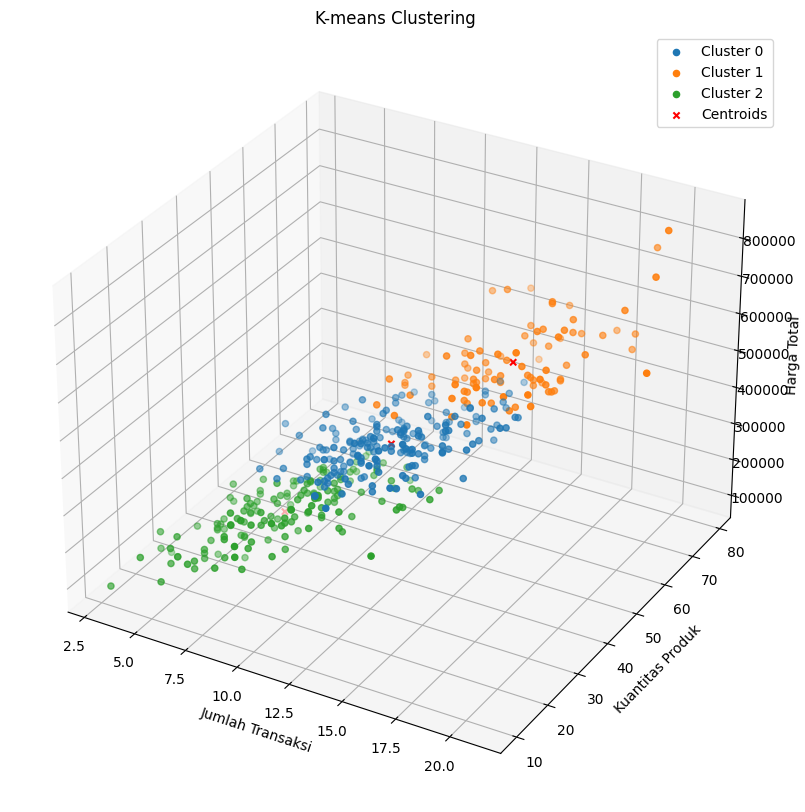

In [ ]:
#membuat model k-means clustering dengan k = 3
modelopt = KMeans(n_clusters=3, init="k-means++", n_init=10,max_iter=300,tol=0.0001,random_state=100)
modelopt.fit(cl_df)
labels=modelopt.labels_
centroids=modelopt.cluster_centers_
cl_df["labels"] = labels
#plot data
from mpl_toolkits.mplot3d import Axes3D  # For 3D scatter plot

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")

tr =cl_df["TransactionID"]
qty = cl_df["Qty"]
total = cl_df["TotalAmount"]
cluster_labels = cl_df["labels"]


for cluster in set(cluster_labels):
    cluster_data = cl_df[cl_df["labels"] == cluster]
    ax.scatter(cluster_data['TransactionID'], cluster_data['Qty'], cluster_data['TotalAmount'], label=f'Cluster {cluster}')


#plot centroids
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c="red", marker='x', label='Centroids')


ax.set_xlabel('Jumlah Transaksi')
ax.set_ylabel('Kuantitas Produk')
ax.set_zlabel('Harga Total')
ax.legend()
plt.title('K-means Clustering')
plt.show()

In [ ]:
cl_df.groupby("labels").mean()

,TransactionID,Qty,TotalAmount
labels,,,
0,11.649215,42.340314,378894.764398
1,15.204301,57.720430,544133.333333
2,8.437500,29.556250,237568.750000
